# Data Preprocessing (전처리) 

### 분석 대상의 csv 파일을 import 하고, 분석작업이 가능하도록 전처리 후 이를 시각화해봅니다.

In [2]:
# 필요한 필수 라이브러리를 import 합니다
import pandas as pd
import boto3, sagemaker, json
import requests
import os 

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [3]:
# 외부에 저장되어있는 united-states-inflation-rate-cpi.csv 파일을 다운로드하여, jupyter notebook으로 가져오는 코드 
url = 'https://raw.githubusercontent.com/caracalgit/bedrock-workshop/main/04_Code_Generation/files/united-states-inflation-rate-cpi.csv'

response = requests.get(url)

with open(os.path.join('.', 'united-states-inflation-rate-cpi.csv'), 'wb') as f:
    f.write(response.content)

##    'File downloaded successfully! 가 뜨면 정상적으로 파일이 다운로드되어 로컬 경로에 저장된 것입니다. 
print('File downloaded successfully!') 

File downloaded successfully!


### 아래 코드는 여러분이 Bedrock Claude 모델을 활용하여 작성한 코드입니다.
### 단축키(shift+enter)를 눌러 한 셀 씩 실행하여, 데이터의 전처리 과정을 확인해보세요.

In [4]:
# 1. jupyter 에서 sed를 활용하여, ./united-states-inflation-rate-cpi.csv 파일의 첫 14 레코드를 지우고 싶어


!sed -i '1,14d' ./united-states-inflation-rate-cpi.csv

In [5]:
# 2.  ./united-states-inflation-rate-cpi.csv파일을 dataframe으로 로드해줘

df = pd.read_csv('./united-states-inflation-rate-cpi.csv')

In [24]:
# 3. df에 처음 5개 레코드를 보여줘

df.head() 

2  1961-12-31   1.0707  -0.39   0
2  1961-12-31   1.0707  -0.39   0
3  1962-12-31   1.1988   0.13   0
4  1963-12-31   1.2397   0.04   0
5  1964-12-31   1.2789   0.04   0
6  1965-12-31   1.5852   0.31   0

In [23]:
# 4. NaN 값을 0으로 대체해줘

df = df.fillna(0)
print(df)

2   1961-12-31   1.0707  -0.39   0
2   1961-12-31   1.0707  -0.39   0
3   1962-12-31   1.1988   0.13   0
4   1963-12-31   1.2397   0.04   0
5   1964-12-31   1.2789   0.04   0
6   1965-12-31   1.5852   0.31   0
..         ...      ...    ...  ..
59  2018-12-31   2.4426   0.31   0
60  2019-12-31   1.8122  -0.63   0
61  2020-12-31   1.2336  -0.58   0
62  2021-12-31   4.6979   3.46   0
63  2022-12-31   8.0028   3.30   0

[62 rows x 4 columns]


/tmp/ipykernel_10925/1710774015.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


In [22]:
# 5. df의 레코드 첫 행을 열 이름으로 사용해줘

df.columns = df.iloc[0]
print(df)

2   1961-12-31   1.0707  -0.39  0
2   1961-12-31   1.0707  -0.39  0
3   1962-12-31   1.1988   0.13  0
4   1963-12-31   1.2397   0.04  0
5   1964-12-31   1.2789   0.04  0
6   1965-12-31   1.5852   0.31  0
..         ...      ...    ... ..
59  2018-12-31   2.4426   0.31  0
60  2019-12-31   1.8122  -0.63  0
61  2020-12-31   1.2336  -0.58  0
62  2021-12-31   4.6979   3.46  0
63  2022-12-31   8.0028   3.30  0

[62 rows x 4 columns]


In [20]:
# 6. df에서 첫 행은 지워줘

df = df.iloc[1:] 
print(df)

0         date   Inflation Rate (%)   Annual Change   
2   1961-12-31               1.0707           -0.39  0
3   1962-12-31               1.1988            0.13  0
4   1963-12-31               1.2397            0.04  0
5   1964-12-31               1.2789            0.04  0
6   1965-12-31               1.5852            0.31  0
..         ...                  ...             ... ..
59  2018-12-31               2.4426            0.31  0
60  2019-12-31               1.8122           -0.63  0
61  2020-12-31               1.2336           -0.58  0
62  2021-12-31               4.6979            3.46  0
63  2022-12-31               8.0028            3.30  0

[62 rows x 4 columns]


In [11]:
# 7. df 데이터에 대해 요약해줘
df.describe()

0             date  Inflation Rate (%)  Annual Change    
count           63                  63             63  63
unique          63                  63             58   1
top     1960-12-31               1.458           1.19   0
freq             1                   1              2  63

In [19]:
# 8. Inflation Rate (%) 열의 type을 numeric으로 설정해줘

df[' Inflation Rate (%)'] = pd.to_numeric(df[' Inflation Rate (%)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 1 to 63
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 63 non-null     object 
 1    Inflation Rate (%)  63 non-null     float64
 2    Annual Change       63 non-null     float64
 3                        63 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.1+ KB


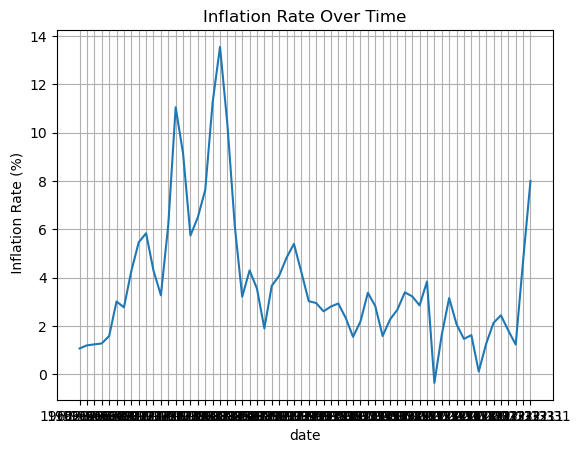

In [49]:
# 9. df 데이터 기반으로 시간에 따른 변화율을 보여주는 차트를 만들어줘


import matplotlib.pyplot as plt

plt.plot(df['date'], df[' Inflation Rate (%)'])
plt.title('Inflation Rate Over Time')
plt.xlabel('date')  
plt.ylabel(' Inflation Rate (%)')
plt.grid()

plt.show()


In [18]:
# 10.  Annual Change 열을 numeric으로 설정해줘

df[' Annual Change'] = pd.to_numeric(df[' Annual Change'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 1 to 63
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 63 non-null     object 
 1    Inflation Rate (%)  63 non-null     float64
 2    Annual Change       63 non-null     float64
 3                        63 non-null     object 
dtypes: float64(2), object(2)
memory usage: 2.1+ KB


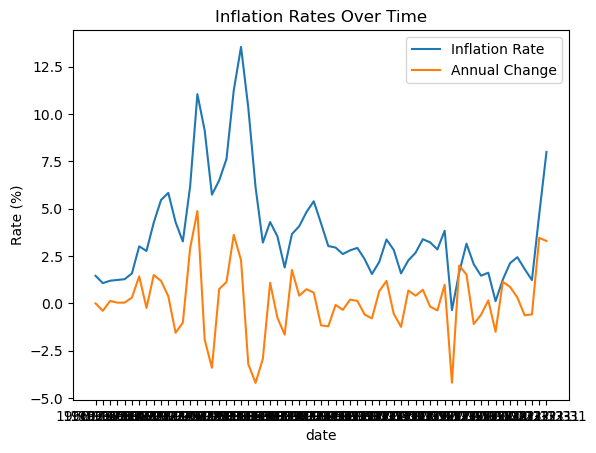

In [17]:
# 11. 인플레이션 비율과 연관 변화율을 시간에 따라 보여주는 차트를 show 해줘. 그리고 타이틀도 달아주고, 레이블과 제목도 추가해줘

import matplotlib.pyplot as plt

plt.plot(df['date'], df[' Inflation Rate (%)'], label='Inflation Rate')
plt.plot(df['date'], df[' Annual Change'], label='Annual Change')

plt.title('Inflation Rates Over Time')
plt.xlabel('date')
plt.ylabel('Rate (%)')

plt.legend()

plt.show()

In [16]:
# 12. 이 df 를 inflation_rate_updated 라는 이름의 csv파일로 저장해줘

df.to_csv('inflation_rate_updated.csv', index=False)


In [21]:
# 13. 새로운 csv 파일을 S3 버켓  genai-workshop-studio-s3bucket-tcnf9r0hvm0j 에 복사하는 aws cli를 만들어줘
# 아래 cli의 버킷명은 여러분 S3의 버켓명으로 변경하셔야합니다.
# 아래 셀을 실행하면, inflation_rate_updated.csv 파일이 나의 버켓에 업로드 된 것을 확인할 수 있습니다.
!aws s3 cp inflation_rate_updated.csv s3://genai-workshop-studio-s3bucket-xxxxxxxxxxxx/inflation_rate_updated.csv

upload: ./inflation_rate_updated.csv to s3://genai-workshop-studio-s3bucket-tcnf9r0hvm0j/inflation_rate_updated.csv
